# E-commerce Customer Churn: Model Building & Evaluation
**Tujuan:** 1. Melakukan Feature Engineering (Encoding & Scaling).
2. Membangun model klasifikasi untuk memprediksi Churn.
3. Mengevaluasi performa model menggunakan Confusion Matrix dan Classification Report.

**Input:** `data/processed/data_churn_cleaned.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

import joblib # Untuk menyimpan model nantinya
import os

In [3]:
# Load data bersih
df = pd.read_csv('../data/processed/data_churn_cleaned.csv', sep=';')

# Pisahkan fitur (X) dan target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Bentuk data fitur: {X.shape}")
print(f"Bentuk data target: {y.shape}")

Bentuk data fitur: (3266, 10)
Bentuk data target: (3266,)


In [4]:
# 1. Identifikasi kolom kategorikal
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Melakukan encoding pada kolom: {cat_cols}")

# 2. Label Encoding (Cocok untuk fitur dengan sedikit kategori)
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# 3. Memastikan semua data sudah numerik
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True) # Jaga-jaga jika ada NaN baru setelah transformasi

display(X.head())

Melakukan encoding pada kolom: ['PreferedOrderCat', 'MaritalStatus', 'CashbackAmount']


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,11.0,4,2,3,2,2,0,7.0,507
1,7.0,11.0,4,3,1,1,2,0,7.0,283
2,8.0,13.0,3,2,1,1,5,0,7.0,1223
3,20.0,11.0,4,0,3,0,7,0,3.0,1963
4,8.0,15.0,4,4,4,2,8,0,8.0,2292


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah Data Latih: {len(X_train)}")
print(f"Jumlah Data Uji: {len(X_test)}")

Jumlah Data Latih: 2612
Jumlah Data Uji: 654


In [6]:
# Inisialisasi Model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Training
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("✅ Model Berhasil Dilatih!")

✅ Model Berhasil Dilatih!


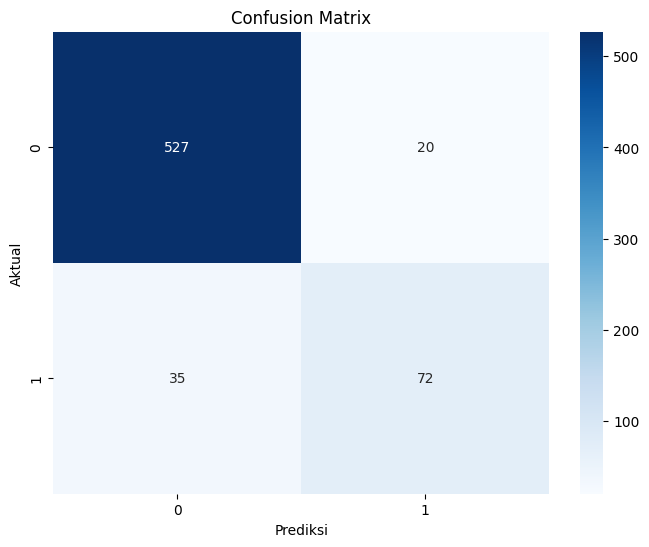


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       547
           1       0.78      0.67      0.72       107

    accuracy                           0.92       654
   macro avg       0.86      0.82      0.84       654
weighted avg       0.91      0.92      0.91       654

ROC-AUC Score: 0.9551


In [7]:
# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 2. Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 3. AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc:.4f}")

C:\Users\etc\AppData\Local\Temp\ipykernel_12944\2666135620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


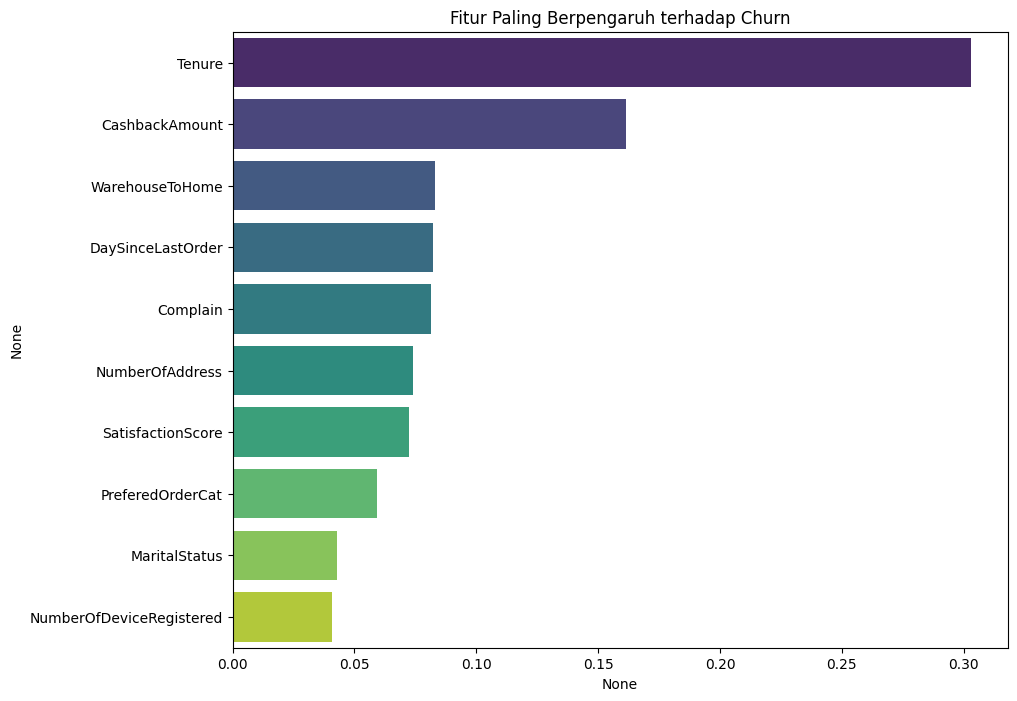

In [8]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title('Fitur Paling Berpengaruh terhadap Churn')
plt.show()

In [9]:
# Buat folder models jika belum ada
os.makedirs('../models', exist_ok=True)

# Simpan model
joblib.dump(model, '../models/churn_rf_model.pkl')
print("🚀 Model disimpan di folder models/churn_rf_model.pkl")

🚀 Model disimpan di folder models/churn_rf_model.pkl
